In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("E:\Sem-5\ML\StudentsPerformance.csv")

In [3]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
def getMeanScore(cols):
    math = cols[0]
    reading = cols[1]
    writing = cols[2]
    
    avg = (math + reading + writing)/3
    return avg

df['mean_score'] = df[['math score','reading score','writing score']].apply(getMeanScore,axis=1)

In [7]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [8]:
df.drop(['math score','reading score','writing score'],inplace=True,axis=1)

In [9]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mean_score
0,female,group B,bachelor's degree,standard,none,72.666667
1,female,group C,some college,standard,completed,82.333333
2,female,group B,master's degree,standard,none,92.666667
3,male,group A,associate's degree,free/reduced,none,49.333333
4,male,group C,some college,standard,none,76.333333


In [10]:
df.rename(columns={'race/ethnicity':'race'},inplace=True)

In [11]:
df.head()

,gender,race,parental level of education,lunch,test preparation course,mean_score
0,female,group B,bachelor's degree,standard,none,72.666667
1,female,group C,some college,standard,completed,82.333333
2,female,group B,master's degree,standard,none,92.666667
3,male,group A,associate's degree,free/reduced,none,49.333333
4,male,group C,some college,standard,none,76.333333


<AxesSubplot:xlabel='race', ylabel='mean_score'>

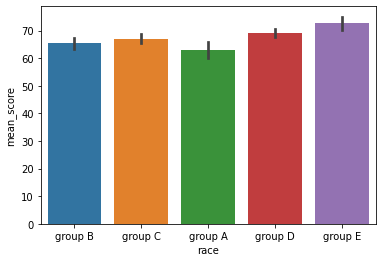

In [12]:
sns.barplot(x='race',y='mean_score',data=df)

<AxesSubplot:xlabel='gender', ylabel='mean_score'>

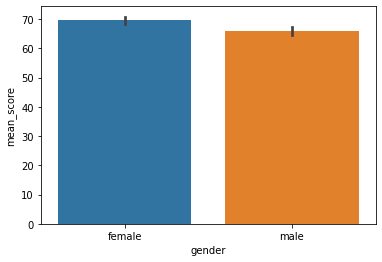

In [13]:
sns.barplot(x='gender',y='mean_score',data=df)

In [14]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

<AxesSubplot:xlabel='parental level of education', ylabel='mean_score'>

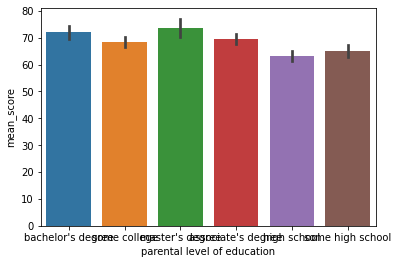

In [15]:
sns.barplot(x='parental level of education',y='mean_score',data=df)

<AxesSubplot:xlabel='lunch', ylabel='mean_score'>

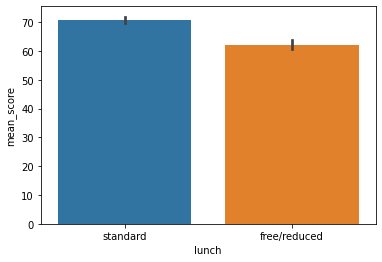

In [16]:
sns.barplot(x='lunch',y='mean_score',data=df)

In [17]:
df.head()

,gender,race,parental level of education,lunch,test preparation course,mean_score
0,female,group B,bachelor's degree,standard,none,72.666667
1,female,group C,some college,standard,completed,82.333333
2,female,group B,master's degree,standard,none,92.666667
3,male,group A,associate's degree,free/reduced,none,49.333333
4,male,group C,some college,standard,none,76.333333


In [18]:
def changeData(col):
    if col[0] == 'free/reduced':
        return 'reduced'
    else:
        return 'standard'
df

df['lunch'] = df[['lunch']].apply(changeData,axis=1)

In [19]:
df.head()

,gender,race,parental level of education,lunch,test preparation course,mean_score
0,female,group B,bachelor's degree,standard,none,72.666667
1,female,group C,some college,standard,completed,82.333333
2,female,group B,master's degree,standard,none,92.666667
3,male,group A,associate's degree,reduced,none,49.333333
4,male,group C,some college,standard,none,76.333333


<AxesSubplot:xlabel='test preparation course', ylabel='mean_score'>

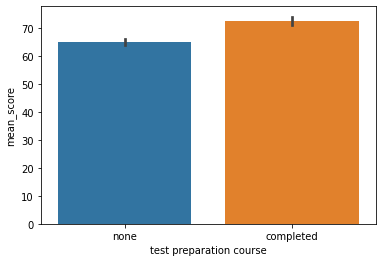

In [20]:
sns.barplot(x='test preparation course',y='mean_score',data=df)

<AxesSubplot:>

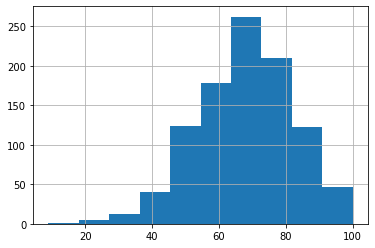

In [21]:
df['mean_score'].hist(bins=10,alpha=1)

In [22]:
def passOrFail(cols):
    data = cols[0]
    if data < 60.0:
        return 0
    else:
        return 1


df['result'] = df[['mean_score']].apply(passOrFail,axis=1)

In [23]:
df['result']

0      1
1      1
2      1
3      0
4      1
      ..
995    1
996    0
997    1
998    1
999    1
Name: result, Length: 1000, dtype: int64

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='result', ylabel='count'>

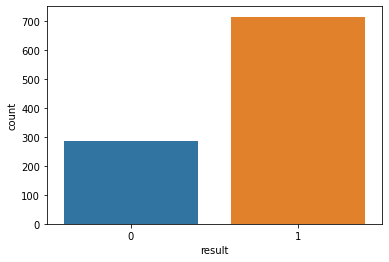

In [24]:
sns.countplot('result',data=df)

In [25]:
Gender = pd.get_dummies(df['gender'],drop_first=True)

In [26]:
Gender.head()

,male
0,0
1,0
2,0
3,1
4,1


In [27]:
Race = pd.get_dummies(df['race'],drop_first=True)

In [28]:
Race.head()

,group B,group C,group D,group E
0,1,0,0,0
1,0,1,0,0
2,1,0,0,0
3,0,0,0,0
4,0,1,0,0


In [29]:
Lunch = pd.get_dummies(df['lunch'],drop_first=True)

In [30]:
Lunch.head()

,standard
0,1
1,1
2,1
3,0
4,1


In [31]:
Test_Prep_Score = pd.get_dummies(df['test preparation course'],drop_first=True)

In [32]:
Test_Prep_Score.head()

,none
0,1
1,0
2,1
3,1
4,1


In [33]:
def checkValue(cols):
    val = cols[0]
    if val == 'some high school':
        return 0
    elif val == 'high school':
        return 1
    elif val == 'some college':
        return 2
    elif val == "associate's degree":
        return 3
    elif val == "bachelor's degree":
        return 4
    else:
        return 5


df['parental level of education'] = df[['parental level of education']].apply(checkValue,axis=1)

In [34]:
df.head()

,gender,race,parental level of education,lunch,test preparation course,mean_score,result
0,female,group B,4,standard,none,72.666667,1
1,female,group C,2,standard,completed,82.333333,1
2,female,group B,5,standard,none,92.666667,1
3,male,group A,3,reduced,none,49.333333,0
4,male,group C,2,standard,none,76.333333,1


In [35]:
df.drop(['gender','race','lunch','test preparation course','mean_score'],inplace=True,axis=1)

In [36]:
df.head()

,parental level of education,result
0,4,1
1,2,1
2,5,1
3,3,0
4,2,1


In [37]:
new_df = pd.concat([df,Gender,Race,Lunch,Test_Prep_Score],axis=1)

In [38]:
new_df

,parental level of education,result,male,group B,group C,group D,group E,standard,none
0,4,1,0,1,0,0,0,1,1
1,2,1,0,0,1,0,0,1,0
2,5,1,0,1,0,0,0,1,1
3,3,0,1,0,0,0,0,0,1
4,2,1,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...
995,5,1,0,0,0,0,1,1,0
996,1,0,1,0,1,0,0,0,1
997,1,1,0,0,1,0,0,0,0
998,2,1,0,0,0,1,0,1,0


In [39]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   parental level of education  1000 non-null   int64
 1   result                       1000 non-null   int64
 2   male                         1000 non-null   uint8
 3   group B                      1000 non-null   uint8
 4   group C                      1000 non-null   uint8
 5   group D                      1000 non-null   uint8
 6   group E                      1000 non-null   uint8
 7   standard                     1000 non-null   uint8
 8   none                         1000 non-null   uint8
dtypes: int64(2), uint8(7)
memory usage: 22.6 KB


# Model Building

In [40]:
new_df.drop('result',axis=1)

,parental level of education,male,group B,group C,group D,group E,standard,none
0,4,0,1,0,0,0,1,1
1,2,0,0,1,0,0,1,0
2,5,0,1,0,0,0,1,1
3,3,1,0,0,0,0,0,1
4,2,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...
995,5,0,0,0,0,1,1,0
996,1,1,0,1,0,0,0,1
997,1,0,0,1,0,0,0,0
998,2,0,0,0,1,0,1,0


In [41]:
new_df['result']

0      1
1      1
2      1
3      0
4      1
      ..
995    1
996    0
997    1
998    1
999    1
Name: result, Length: 1000, dtype: int64

In [42]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   parental level of education  1000 non-null   int64
 1   result                       1000 non-null   int64
 2   male                         1000 non-null   uint8
 3   group B                      1000 non-null   uint8
 4   group C                      1000 non-null   uint8
 5   group D                      1000 non-null   uint8
 6   group E                      1000 non-null   uint8
 7   standard                     1000 non-null   uint8
 8   none                         1000 non-null   uint8
dtypes: int64(2), uint8(7)
memory usage: 22.6 KB


In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train,x_test,y_train,y_test = train_test_split(new_df.drop('result',axis=1),new_df['result'],
                                                test_size=0.30,random_state=101)

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
model = LogisticRegression()

In [47]:
model.fit(x_train,y_train)

LogisticRegression()

In [48]:
predictions = model.predict(x_test)

In [49]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0], d

In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
accuracy = confusion_matrix(y_test,predictions)

In [52]:
accuracy

array([[ 24,  54],
       [ 30, 192]], dtype=int64)

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
accuracy_scr = accuracy_score(y_test,predictions)

In [55]:
accuracy_scr

0.72